<a href="https://colab.research.google.com/github/mehrnaz1368/classification/blob/main/Classification_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os
df = pd.read_csv('heart.csv')

In [2]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

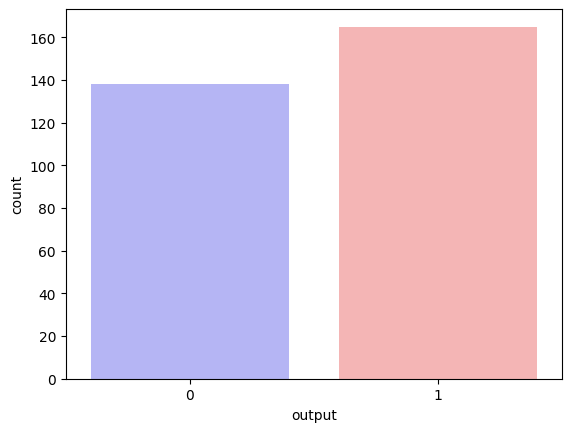

In [5]:
sns.countplot(x="output", data=df, palette="bwr")
plt.show()

In [6]:
countNoDisease = len(df[df.output == 0])
countHaveDisease = len(df[df.output == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.output))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.output))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


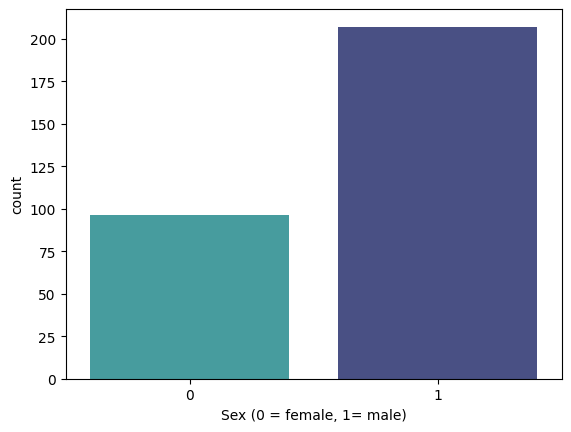

In [7]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [8]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [9]:
df.groupby('output').mean()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


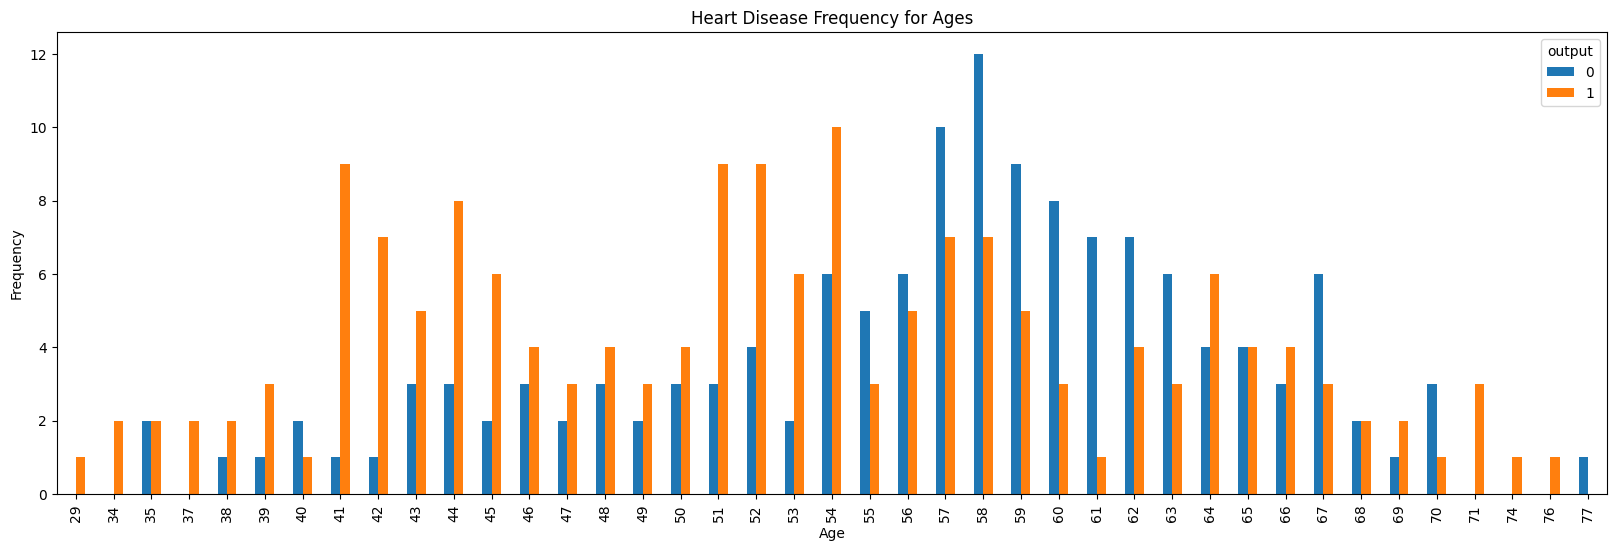

In [10]:
pd.crosstab(df.age,df.output).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

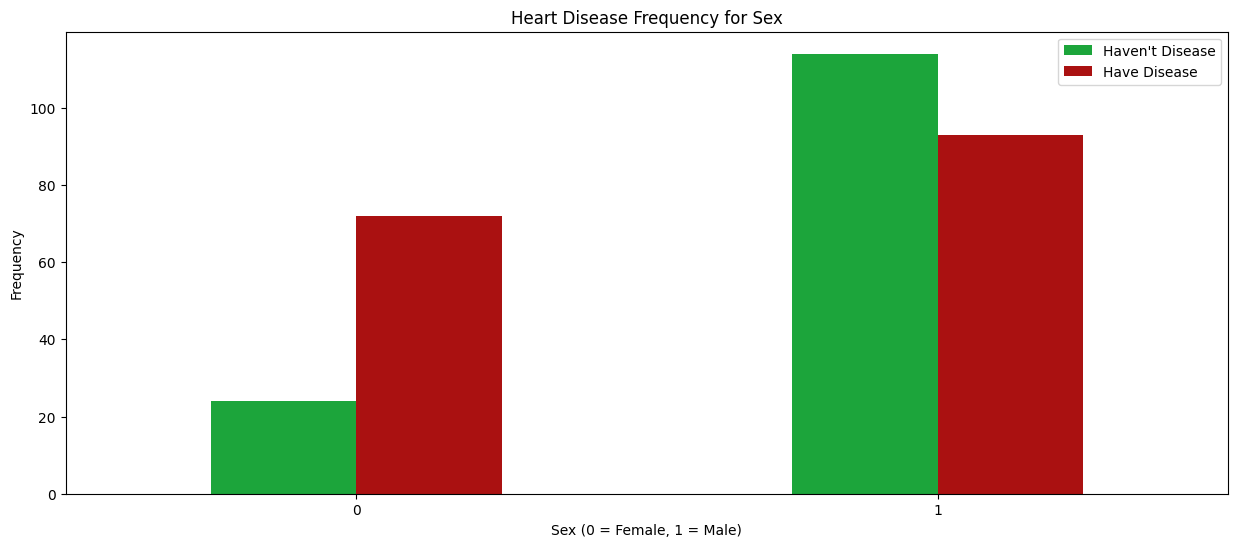

In [11]:
pd.crosstab(df.sex,df.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

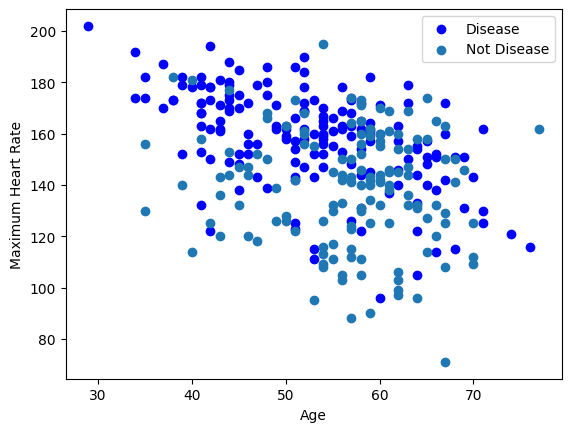

In [13]:
plt.scatter(x=df.age[df.output==1], y=df.thalachh[(df.output==1)], c="blue")
plt.scatter(x=df.age[df.output==0], y=df.thalachh[(df.output==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

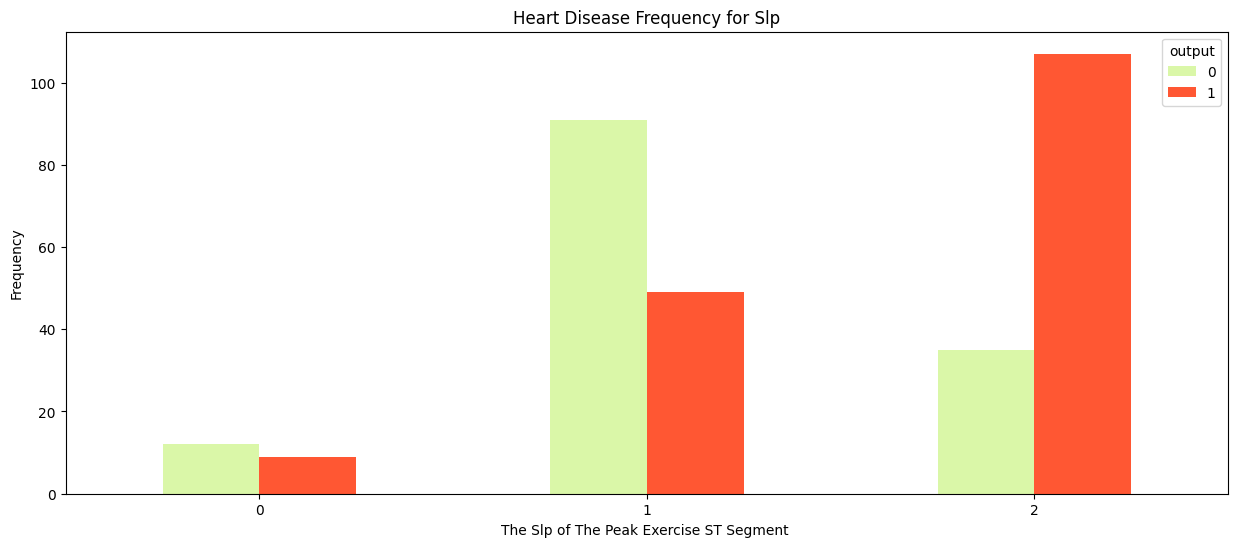

In [18]:
pd.crosstab(df.slp,df.output).plot(kind="bar",figsize=(15,6),color=['#DAF7A8','#FF5733' ])
plt.title('Heart Disease Frequency for Slp')
plt.xlabel('The Slp of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

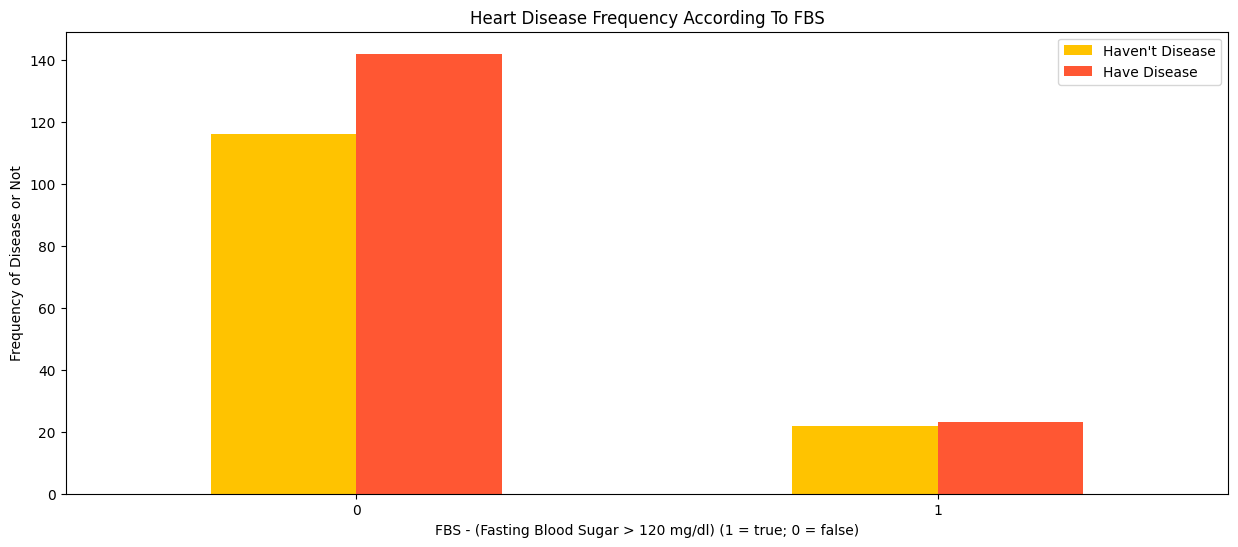

In [20]:
pd.crosstab(df.fbs,df.output).plot(kind="bar",figsize=(15,6),color=['#FFC300','#FF5733' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

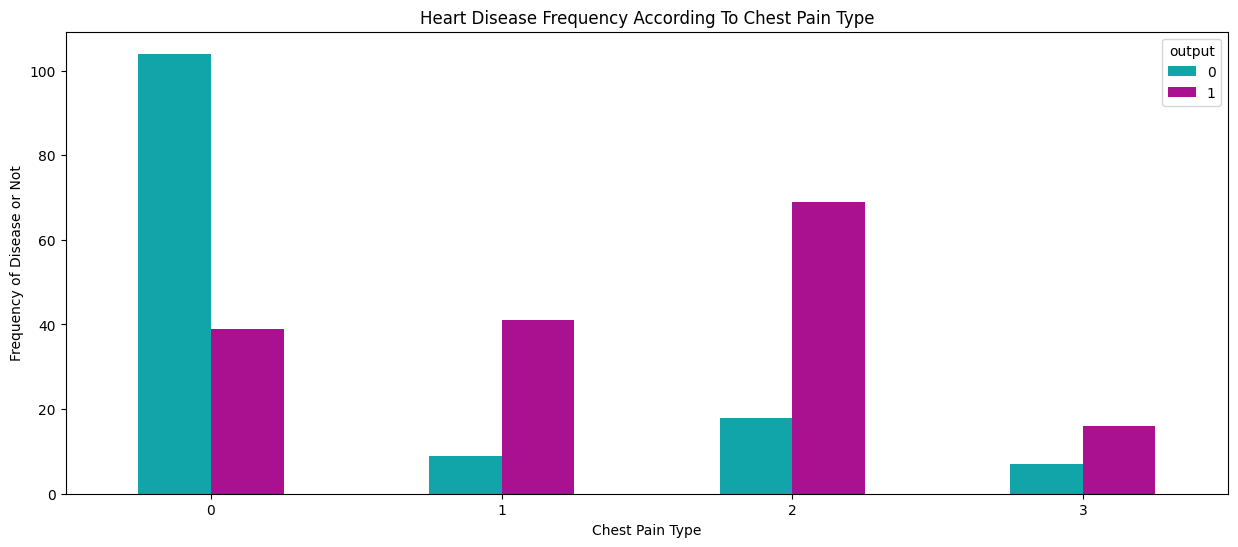

In [21]:
pd.crosstab(df.cp,df.output).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

#generating dummy variable

In [22]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thalachh'], prefix = "thalachh")
c = pd.get_dummies(df['slp'], prefix = "slp")

In [23]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,...,thalachh_187,thalachh_188,thalachh_190,thalachh_192,thalachh_194,thalachh_195,thalachh_202,slp_0,slp_1,slp_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,0,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,0,0,0,0,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,0,0,0,0,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,0,0,0,0,1


In [24]:
df = df.drop(columns = ['cp', 'thalachh', 'slp'])
df.head()

,age,sex,trtbps,chol,fbs,restecg,exng,oldpeak,caa,thall,...,thalachh_187,thalachh_188,thalachh_190,thalachh_192,thalachh_194,thalachh_195,thalachh_202,slp_0,slp_1,slp_2
0,63,1,145,233,1,0,0,2.3,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,1,0,3.5,0,2,...,1,0,0,0,0,0,0,1,0,0
2,41,0,130,204,0,0,0,1.4,0,2,...,0,0,0,0,0,0,0,0,0,1
3,56,1,120,236,0,1,0,0.8,0,2,...,0,0,0,0,0,0,0,0,0,1
4,57,0,120,354,0,1,1,0.6,0,2,...,0,0,0,0,0,0,0,0,0,1


#Classification with Regression Logestic

In [25]:
y = df.output.values
x_data = df.drop(['output'], axis = 1)

#Normalize

In [26]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


#create train and test

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [38]:
from sklearn.datasets import load_iris
>>> from sklearn.linear_model import LogisticRegression

In [40]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

In [41]:
clf

LogisticRegression(random_state=0)

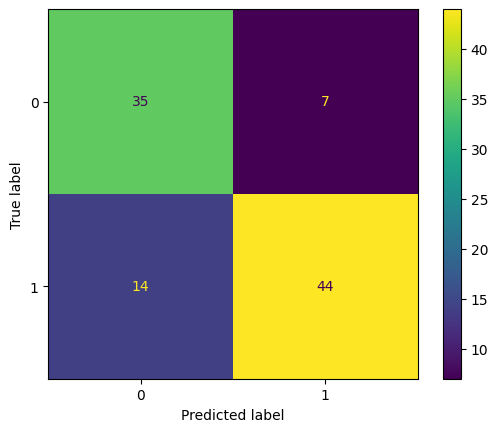

In [46]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test)